# Predicting Heart Disease using Machine Learning

1. Problem Definition: Given clinical parameters about a patient, can we predict whether or not they have heart disease?
#### Data:
The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## Preparing the tools

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

## Importing the data set

In [2]:
df =pd.read_csv("heart disease classification dataset.csv")

In [3]:
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


# EDA


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [5]:
# Load data
df = pd.read_csv(r"heart disease classification dataset.csv")
df.shape # (rows, columns)


(303, 15)

1. **ST-T Wave abnormality**
   - Can range from mild symptoms to severe problems.
   - Signals non-normal heart beat.

2. **Possible or definite left ventricular hypertrophy**
   - Enlarged heart's main pumping chamber.

- `thalach` - Maximum heart rate achieved.
- `exang` - Exercise-induced angina (1 = yes; 0 = no).
- `oldpeak` - ST depression induced by exercise relative to rest.
   - Looks at stress of heart during exercise.
   - Unhealthy heart will stress more.

- `slope` - The slope of the peak exercise ST segment.
   - 0: Upsloping - Better heart rate with exercise (uncommon).
   - 1: Flatsloping - Minimal change (typical healthy heart).
   - 2: Downsloping - Signs of an unhealthy heart.

- `ca` - Number of major vessels (0-3) colored by fluoroscopy.
   - Colored vessel means the doctor can see the blood passing through.
   - The more blood movement, the better (no clots).

- `thal` - Thallium stress result.
   - 1, 3: Normal.
   - 6: Fixed defect - Used to be a defect but ok now.
   - 7: Reversible defect - No proper blood movement when exercising.

- `target` - Have disease or not (1 = yes, 0 = no) (= the predicted attribute).
- signals non-normal heart beat
- 2: Possible or definite left ventricular hypertrophy
- Enlarged heart's main pumping chamber
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- looks at stress of heart during excercise
- unhealthy heart will stress more
- slope - the slope of the peak exercise ST segment
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart
- ca - number of major vessels (0-3) colored by flourosopy
- colored vessel means the doctor can see the blood passing through
- the more blood movement the better (no clots)
- thal - thalium stress result
- 1,3: normal
- 6: fixed defect: used to be defect but ok now
- 7: reversable defect: no proper blood movement when excercising
- target - have disease or not (1=yes, 0=no) (= the predicted attribute)
- Note: No personal identifiable information (PPI) can be found in the dataset.

In [6]:
df.dropna(inplace = True)

In [7]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  293 non-null    int64  
 1   age         293 non-null    int64  
 2   sex         293 non-null    object 
 3   cp          293 non-null    int64  
 4   trestbps    293 non-null    float64
 5   chol        293 non-null    float64
 6   fbs         293 non-null    int64  
 7   restecg     293 non-null    int64  
 8   thalach     293 non-null    float64
 9   exang       293 non-null    int64  
 10  oldpeak     293 non-null    float64
 11  slope       293 non-null    int64  
 12  ca          293 non-null    int64  
 13  thal        293 non-null    int64  
 14  target      293 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 36.6+ KB


In [9]:
df.target.value_counts()

yes    160
no     133
Name: target, dtype: int64

In [10]:
df.target.value_counts(normalize = True)

yes    0.546075
no     0.453925
Name: target, dtype: float64

In [11]:
df.sex.value_counts()

male      202
female     91
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,female,male
target,,
no,23,110
yes,68,92


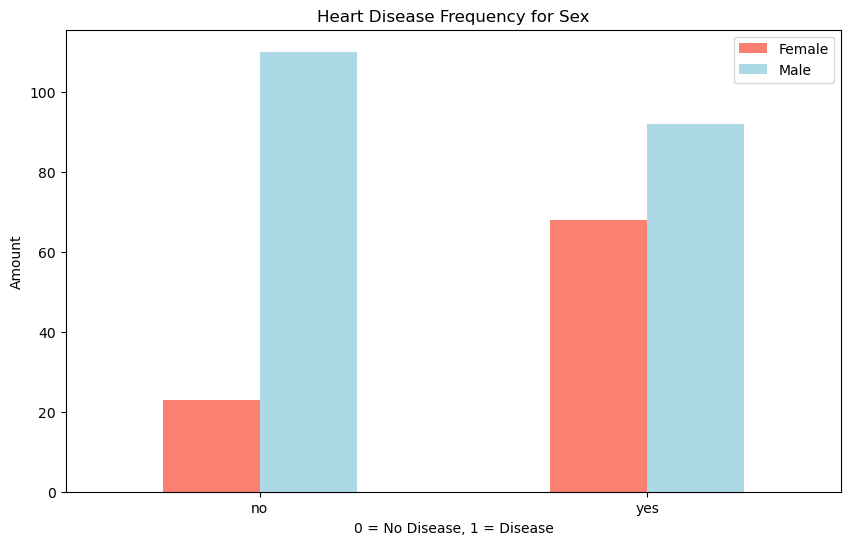

In [13]:
# Creating a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age vs Max Heart rate for Heart Disease



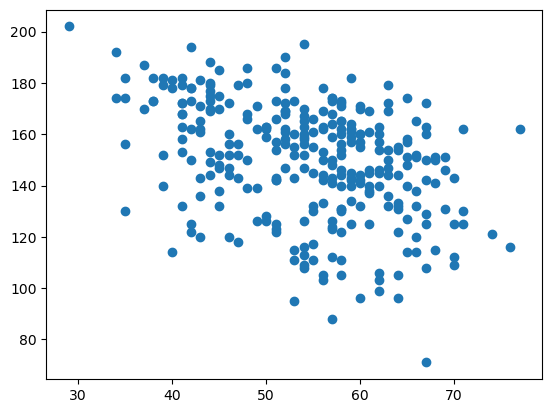

In [14]:
plt.scatter(df.age, df.thalach)

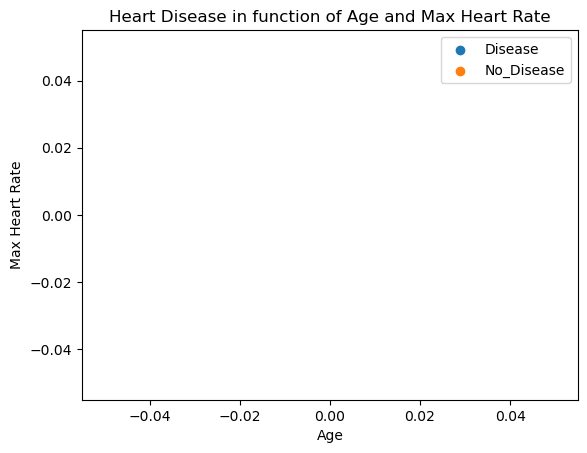

In [15]:
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1])
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");
plt.legend(["Disease", "No_Disease"])

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

## age distribution.


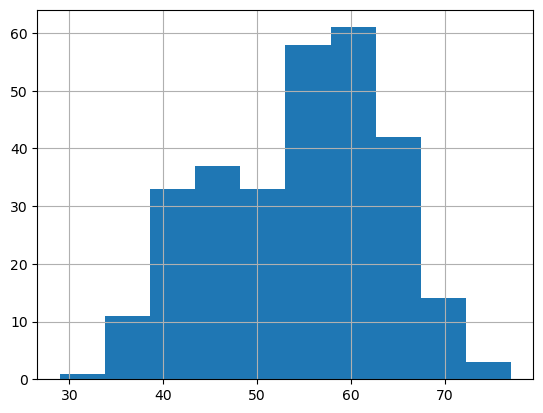

In [16]:
df.age.hist();

## Heart Disease Frequency per Chest Pain Type


In [17]:
pd.crosstab(df.cp, df.target)

target,no,yes
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


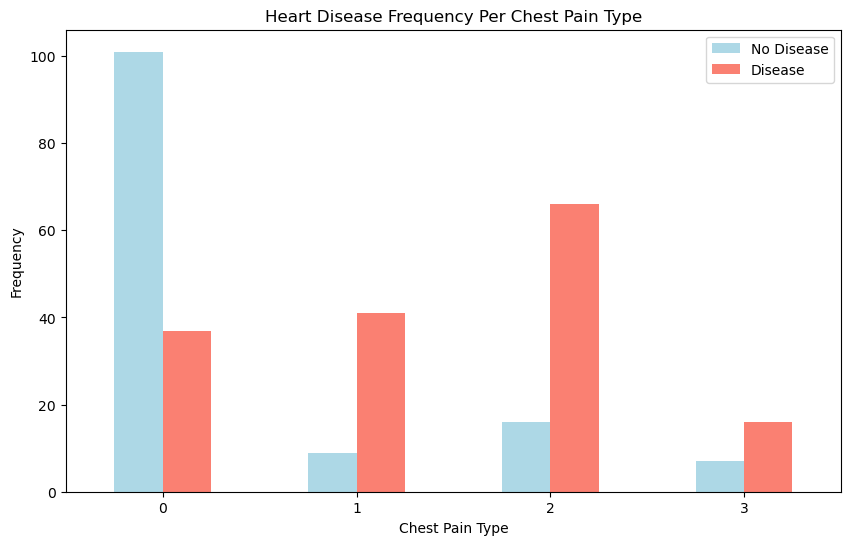

In [18]:
# Creating a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Adding attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);


Observation:

Remember from our data dictionary what the different levels of chest pain are.

- `cp` - Chest pain type
  - 0: Typical angina - Chest pain related decrease blood supply to the heart
  - 1: Atypical angina - Chest pain not related to heart
  - 2: Non-anginal pain - Typically esophageal spasms (non heart related)
  - 3: Asymptomatic - Chest pain not showing signs of disease
  
"atypical angina" (value 1) is stated as not  related to the heart, but it seems to have a higher ratio of participants with heart disease than not.

"atypical angina" even mean?

According to PubMed, it appears that even some medical professionals are confused by the term.



In [19]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Unnamed: 0,1.000000,0.179975,-0.398856,0.098182,0.051948,-0.008088,-0.019919,-0.391267,0.378961,0.307510,-0.274223,0.380823,0.264371
age,0.179975,1.000000,-0.070586,0.276586,0.216155,0.127349,-0.119509,-0.396884,0.095919,0.211278,-0.167542,0.280493,0.067060
cp,-0.398856,-0.070586,1.000000,0.051210,-0.091003,0.097889,0.045198,0.302782,-0.391609,-0.153591,0.122779,-0.182492,-0.171826
trestbps,0.098182,0.276586,0.051210,1.000000,0.135529,0.168406,-0.102731,-0.028102,0.072459,0.193254,-0.115657,0.096166,0.073411
chol,0.051948,0.216155,-0.091003,0.135529,1.000000,0.026193,-0.166307,-0.038738,0.071904,0.066434,-0.026953,0.089595,0.106809
fbs,-0.008088,0.127349,0.097889,0.168406,0.026193,1.000000,-0.078938,0.001339,0.036164,0.009607,-0.060520,0.118146,-0.012527
restecg,-0.019919,-0.119509,0.045198,-0.102731,-0.166307,-0.078938,1.000000,0.038211,-0.073327,-0.051767,0.087550,-0.069496,-0.018690
thalach,-0.391267,-0.396884,0.302782,-0.028102,-0.038738,0.001339,0.038211,1.000000,-0.395491,-0.347278,0.379258,-0.207472,-0.099342
exang,0.378961,0.095919,-0.391609,0.072459,0.071904,0.036164,-0.073327,-0.395491,1.000000,0.286938,-0.259066,0.121005,0.199949
oldpeak,0.307510,0.211278,-0.153591,0.193254,0.066434,0.009607,-0.051767,-0.347278,0.286938,1.000000,-0.572282,0.225590,0.206558


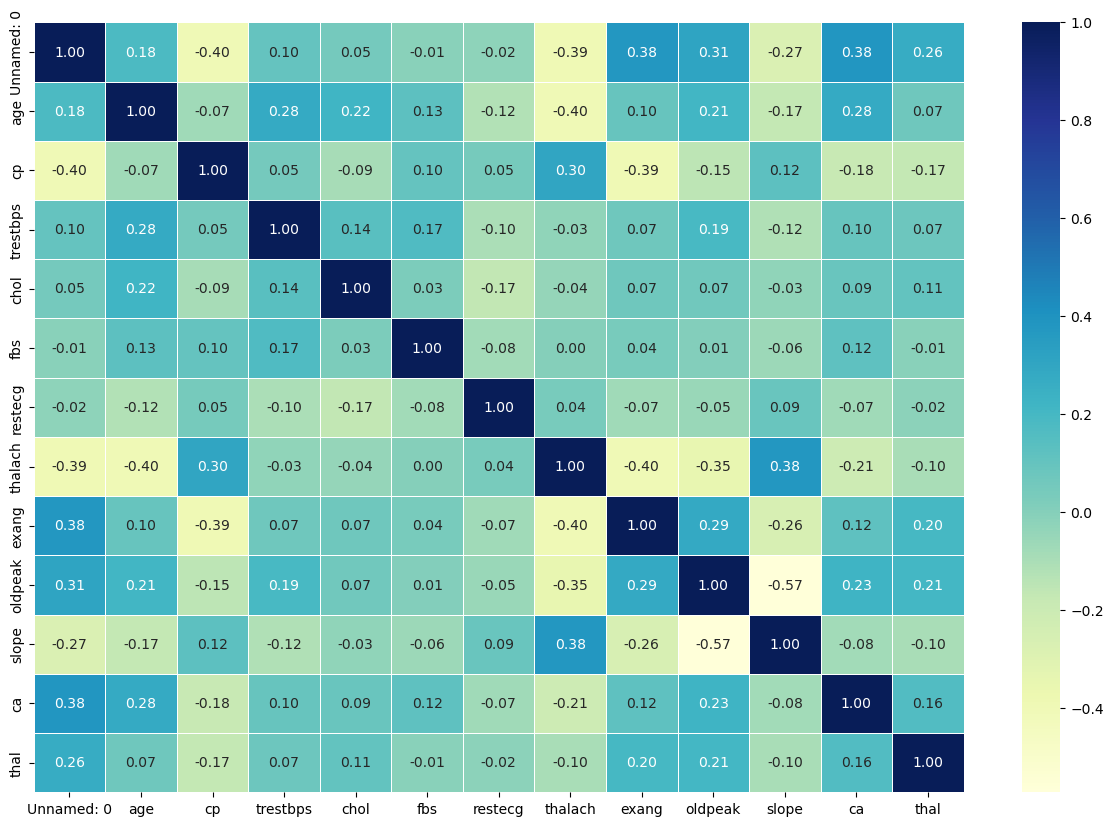

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).


In [21]:
df.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"]  = le.fit_transform(df["sex"])

In [23]:
#predicting  target variable using all of the other variables. To do this, we'll split the target variable from the rest.


X = df.drop("target", axis = 1)
y = df['target'].values

In [24]:
# Random seed for reproducibility
np.random.seed(42)

# Spliting into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

### Now using the following ml models and comparing their results.

Logistic Regression - LogisticRegression()

K-Nearest Neighbors - KNeighboursClassifier()

RandomForest - RandomForestClassifier()

Since the dataset is relatively small, I can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model,model.fit(X_train, y_train)

and for scoring a model model.score(X_test, y_test)

.score() returns the ratio of correct predictions (1.0 = 100% correct).

In [25]:
# put models in a dictionary
models = {"KNN" : KNeighborsClassifier() , 
         "LogisticRegression" : LogisticRegression(max_iter=1000), 
         "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    """ Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data """
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    
    for name , model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 1.0, 'LogisticRegression': 1.0, 'Random Forest': 1.0}

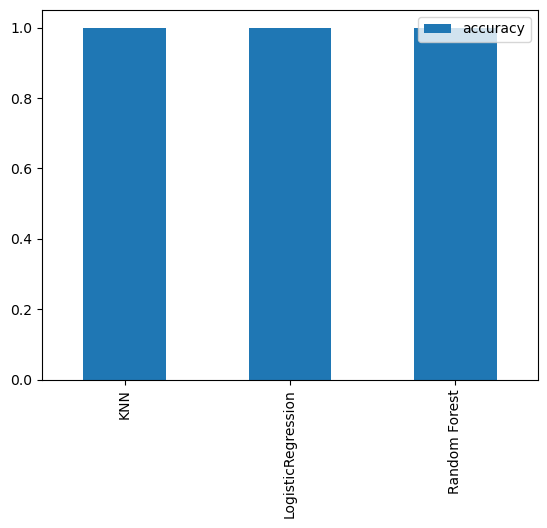

In [27]:
model_compare = pd.DataFrame(model_scores, index= ["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning and cross-validation to find the most important model features

## Tuning  KNN model

In [28]:
train_scores = []
test_scores = []
# Create a different values for the no of neighbors
neighbors = range(1, 21)#
# set up KNN instance 
knn = KNeighborsClassifier()
#Loop through different no of neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    ## update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    ## update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
test_scores

[0.9491525423728814,
 0.9830508474576272,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [30]:
train_scores

[1.0,
 0.9786324786324786,
 1.0,
 0.9871794871794872,
 0.9786324786324786,
 0.9871794871794872,
 0.9829059829059829,
 0.9829059829059829,
 0.9914529914529915,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9829059829059829,
 0.9871794871794872,
 0.9829059829059829,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872]

#### Hyper parameter tuning with randomized searchCV
* Models to be tuned: 
* LogisticRegression() 
* and RandomForestClassifier()
* using RandomisedSearchCV

In [31]:
# a hyperparameter grid for logistic Regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20), "solver" : ['liblinear']}
# a hyper parameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we have got our hyperparameter grids setup for each of our model, lets tune them using RandomisedSearchCV....

In [32]:
# Tuning LogististicRegression
np.random.seed(42)
# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression() , param_distributions = log_reg_grid , cv = 5, n_iter = 20, verbose = True)
 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [34]:
rs_log_reg.score(X_test, y_test)

0.9830508474576272

Now we have tuned the LogisticRegression Model . Now lets do the same for the RandomForestClassifier

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fitting random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# Finding the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [37]:
# Evaluating the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0